Ноутбук соревнования https://boosters.pro/champ_3

In [19]:
%matplotlib inline
%pylab inline

import pandas as pd
import seaborn as sns

from __future__ import division  # чтобы 1/2 = было равно 0.5, а не 0

from sklearn.model_selection import train_test_split

from pylab import rcParams
rcParams['figure.figsize'] = 5, 3  # чтобы дефолтные размеры графиков были поменьше

Populating the interactive namespace from numpy and matplotlib


# Смотрим на данные:

In [20]:
df = pd.read_csv('credit_train.csv', sep=';', encoding='cp1251', decimal=',')
df_test = pd.read_csv('credit_test.csv', sep=';', encoding='cp1251', decimal=',')

In [21]:
df

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,48,MAR,UMN,59998.00,10,1.6,0.770249,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,28,MAR,UMN,10889.00,6,1.1,0.248514,GRD,МОСКВА,43000.0,2.0,0.0,0
2,3,M,32,MAR,SPC,10728.00,12,1.1,0.459589,SCH,ОБЛ САРАТОВСКАЯ,23000.0,5.0,0.0,0
3,4,F,27,DIV,SPC,12009.09,12,1.1,0.362536,GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0
4,5,M,45,MAR,SPC,16908.89,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0
5,6,F,37,MAR,SPC,26788.00,10,1.1,0.484203,SCH,СТАВРОПОЛЬСКИЙ КРАЙ,30000.0,0.0,0.0,0
6,7,M,34,MAR,SPC,10317.00,6,1.5,0.276012,SCH,ОБЛ НИЖЕГОРОДСКАЯ,28000.0,3.0,0.0,0
7,8,F,26,UNM,SPC,47878.00,10,1.1,0.512525,GRD,МОСКОВСКАЯ ОБЛ,60000.0,3.0,0.0,0
8,9,M,23,UNM,SPC,37577.16,12,1.6,0.642267,SCH,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА,50000.0,3.0,0.0,0
9,10,F,32,UNM,SPC,26268.00,10,1.1,0.465026,GRD,КРАЙ СТАВРОПОЛЬСКИЙ,39500.0,7.0,0.0,0


## Таргет:

In [22]:
df.open_account_flg.value_counts(normalize=True)
# 1 - клиент взял кредит Тинькофф
# 0 - клиент отказался

0    0.823972
1    0.176028
Name: open_account_flg, dtype: float64

## Колонки с данными:

### Пол

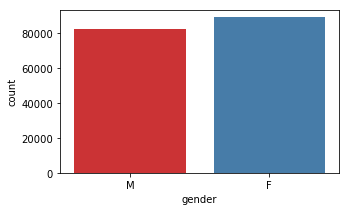

In [23]:
_ = sns.countplot(df.gender, palette='Set1')

### Возраст

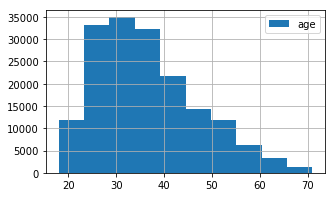

In [24]:
_ = df.age.hist(label='age')
_ = legend()

### Семейное положение

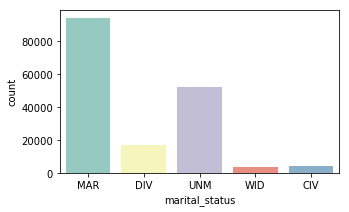

In [25]:
_ = sns.countplot(df.marital_status, palette='Set3')

### Работа
- SPC	Неруководящий сотрудник - специалист
- DIR	Руководитель организации
- HSK	Домохозяйка
- INV	Не работает (инвалидность)
- WOI	Работает на ИП
- WRK	Неруководящий сотрудник - рабочий
- ATP	Неруководящий сотрудник - обслуживающий персонал
- WRP	Работающий пенсионер
- UMN	Руководитель подразделения
- NOR	Не работает
- PNS	Пенсионер
- BIS	Собственный бизнес
- INP	Индивидуальный предприниматель

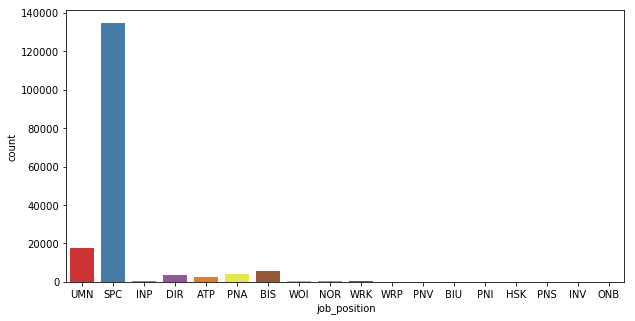

In [26]:
figure(figsize=(10, 5))
_ = sns.countplot(df.job_position, palette='Set1')

In [27]:
df.job_position.value_counts(dropna=False)

SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: job_position, dtype: int64

### Размер кредита

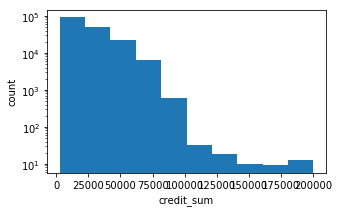

In [28]:
hist(df.credit_sum, log=True)
xlabel('credit_sum')
_ = ylabel('count')

### Когда будем возвращать?

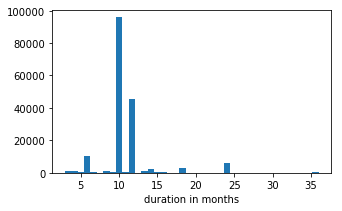

In [29]:
hist(df.credit_month, bins=40)
_ = xlabel('duration in months')

### Есть разные тарифы....

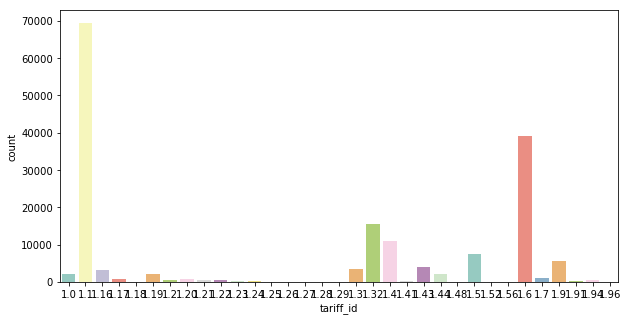

In [30]:
figure(figsize=(10, 5))
_ = sns.countplot(df.tariff_id, palette='Set3')

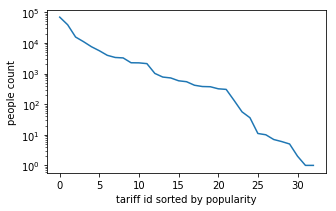

In [31]:
plot(df.tariff_id.value_counts().values)
yscale('log')
_ = xlabel('tariff id sorted by popularity')
_ = ylabel('people count')

In [32]:
# ^^^^^^видим, что популярность различных тарифов задается логарифмическим законом

### Какая-то непонятная величина с нормальным распределением

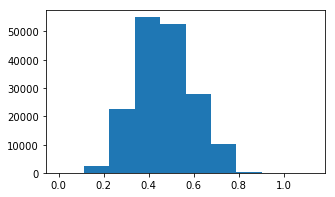

In [33]:
_ = hist(df.score_shk)

### Образование

- SCH	Начальное, среднее
- PGR	Второе высшее
- GRD	Высшее
- UGR	Неполное высшее
- ACD	Ученая степень

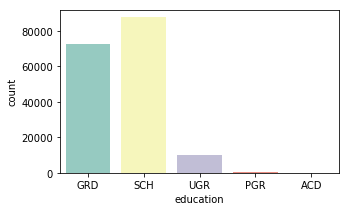

In [34]:
_ = sns.countplot(df.education, palette='Set3')

### Место жительства

In [35]:
df.living_region.value_counts(dropna=False, normalize=True)

ОБЛ МОСКОВСКАЯ                              0.071615
КРАСНОДАРСКИЙ КРАЙ                          0.043673
САНКТ-ПЕТЕРБУРГ                             0.032985
МОСКВА                                      0.032381
ТАТАРСТАН РЕСП                              0.030378
РЕСП БАШКОРТОСТАН                           0.028305
ОБЛ ИРКУТСКАЯ                               0.023895
СВЕРДЛОВСКАЯ ОБЛ                            0.023462
МОСКВА Г                                    0.021359
ОБЛ НИЖЕГОРОДСКАЯ                           0.020820
ОБЛ ЛЕНИНГРАДСКАЯ                           0.018911
РОСТОВСКАЯ ОБЛ                              0.017722
КРАСНОЯРСКИЙ КРАЙ                           0.017154
ЧЕЛЯБИНСКАЯ ОБЛ                             0.017008
ОБЛ САМАРСКАЯ                               0.016645
ОБЛ КЕМЕРОВСКАЯ                             0.016563
ПЕРМСКИЙ КРАЙ                               0.015907
САНКТ-ПЕТЕРБУРГ Г                           0.015421
КРАЙ СТАВРОПОЛЬСКИЙ                         0.

### Доход

NaNs: 1


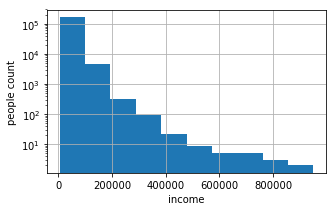

In [36]:
print('NaNs:', sum(np.isnan(df.monthly_income.values)))
df.monthly_income.hist(log=True)
xlabel('income')
_ = ylabel('people count')

NaNs: 9230


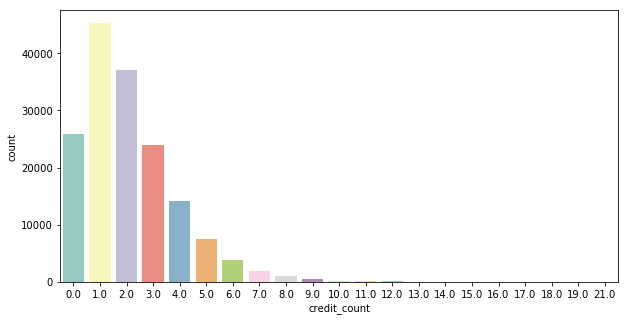

In [37]:
figure(figsize=(10, 5))
print('NaNs:', sum(np.isnan(df.credit_count.values)))
_ = sns.countplot(df.credit_count, palette='Set3')

NaNs: 9230


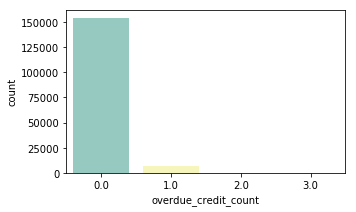

In [38]:
print('NaNs:', sum(np.isnan(df.overdue_credit_count.values)))
_ = sns.countplot(df.overdue_credit_count, palette='Set3')

### Матрица корреляции:

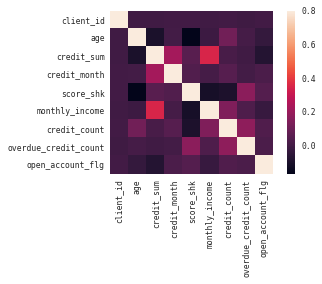

In [39]:
sns.set(context="paper", font="monospace")

corrmat = df.corr()
_ = sns.heatmap(corrmat, vmax=.8, square=True)

Можно заметить, что таргет (который open_account_flg) ни с чем не коррелирует - скорее всего задача не решается простой эвристикой

## Преобразование категориальных фич:

In [40]:
df.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education',
       'living_region', 'monthly_income', 'credit_count',
       'overdue_credit_count', 'open_account_flg'],
      dtype='object')

#### Пол, семейное положение, работу, образование закодируем dummy encoding'ом , потому категорий внутри каждого мало:

In [41]:
df[u'gender_'] = df.gender.map({'M': 0, 'F': 1})
df_test[u'gender_'] = df_test.gender.map({'M': 0, 'F': 1})

In [42]:
def add_dummies(df, column_name, prefix):
    dummies = pd.get_dummies(df[column_name], prefix=prefix, 
                             drop_first=True)
    return pd.concat([df, dummies], axis=1)

In [43]:
df = add_dummies(df, 'marital_status', 'mar')
df_test = add_dummies(df_test, 'marital_status', 'mar')

In [44]:
df = add_dummies(df, 'job_position', 'job')
df_test = add_dummies(df_test, 'job_position', 'job')

In [45]:
df = add_dummies(df, 'education', 'edu')
df_test = add_dummies(df_test, 'education', 'edu')

Здесь мы предполагали, что в тестовом датасете присутствуют все категории, что и в трейне, иначе будет сюрприз, когда алгоритму на вход выдадут больше колонок, чем те, на которых он обучался

#### Номер тарифа и регион закодируем через частоту, потому как слишком много тарифов:

In [46]:
tariff2frequency = dict(df['tariff_id'].value_counts(normalize=True))  
# нормализация нужна, если мы захотим использовать что-то кроме древесных алгоритмов. 
# Важно чтобы колонки не сильно отличались по разбросу чисел. 
# У нас везде [0..1] - пусть и тут будет также
df[u'tariff_freq'] = df['tariff_id'].map(lambda x: tariff2frequency[x])
# df_test[u'tariff_freq'] = df_test['tariff_id'].map(lambda x: tariff2frequency[x])

# - здесь у меня возникла проблема, т.к. оказывается в tariff_freq были не только строчки, 
# но и числа nan, при этом в dict они почему-то не ложились. Выкрутился я так:

from collections import Counter
tariff2count = Counter(df['tariff_id'])
df[u'tariff_freq'] = df['tariff_id'].map(lambda x: tariff2count[x] / len(df))
df_test[u'tariff_freq'] = df_test['tariff_id'].map(lambda x: tariff2count[x] / len(df))

Важно! tariff2frequency - это dict из трейна. Можно было бы взять объединенные данные по трейну и тесту, и, кажется, так и нужно было сделать. Точно не нужно преобразовывать колонку tariff_freq из теста по частотам tariff_id теста - в таком случае частоты будут не те, на которых мы обучались.

In [47]:
region2count = Counter(df['living_region'])
df[u'region_freq'] = df['living_region'].map(lambda x: region2count[x] / len(df))
df_test[u'region_freq'] = df_test['living_region'].map(lambda x: region2count[x] / len(df))

Можно и нужно закодировать через любую другую колонку! Кодирование через частоту из нашей колонки достает только иформацию о том, на сколько популярно было данное значение. Например, пришел ли клиент из большого региона (МО), или из малонаселенного района. Если мы закодируем через средний достаток - мы поймем, насколько люди в этом регионе богаты и мб в комбинации с достатком человека это даст нам хорошую информацию: насолько человек относительно богат.

Можно и нужно попробовать через dummy, но у меня предчувствие, что это приведет к переобучению.

### Нормализация и работа с пропусками:

In [48]:
train_columns = set(df.columns)
columns_transformed = set((u'education', u'gender', u'job_position', 
                           u'living_region', u'marital_status', u'tariff_id'))
target_column = set([u'open_account_flg'])
train_columns -= columns_transformed
train_columns -= target_column
train_columns = sorted(list(train_columns))

#### Посмотрим, сколько у нас колонок с пропусками:

In [49]:
len(df_test['age'])

91940

In [50]:
for column in train_columns: 
    if sum(df[column].isnull()) > 0 or sum(df_test[column].isnull()) > 0:
        print(column, sum(df[column].isnull()), sum(df_test[column].isnull()))

credit_count 9230 4703
monthly_income 1 0
overdue_credit_count 9230 4703


Есть 2 частых подхода при работе с пропусками, когда вы не знаете, что там может стоять. 
- поставить в пропуск число, которое сильно отличается от датасета. Например, -50. Этот подход хорош для древесных алгоритмов, потому что они выделят под этот класс объектов отдельный лист. Но это будет точно плохо работать с линейными или метрическими алгоритмами, потому что это просто рандомное число, и ни на что его умножать 

- поставить в пропуск самое часто встречающееся число (или среднее/медиану по датасету). Первое предположение, что если число пропущено - скорее всего там стояло что-то часто встречающееся. Если у вас есть какие-то дополнительные знания о том, что там могло стоять - можно воспользоваться ими. Например, можно подставить то число, которое часто встречается для объектов с аналогичным значением в другой колонке. Например, если вы по матрице корелляции видите, что credit_count немного кореллирует с достатком, то можно смотреть на достаток и в пропуск вставлять то значение credit_count, которое имеет человек с аналогичным достатком.

In [51]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
X_train = imputer.fit_transform(df[train_columns])
X_test = imputer.transform(df_test[train_columns])

Все величины, которые имеют матожидание != 0 и дисперсию != 1 должны быть отскейлены. Иначе l2-нормализация линейных алгоритмах (log regression, svm) зарубит веса у тех фичей, которые имеют меньший разброс и нулевое мат. ождание. Метрические алгоритмы (KNN, SVM с RBF-ядром) сломаются, потому как расстояние будет меряться неравнозначно по разным координатам: некоторые фичи автоматически станут важнее, просто потому что разброс координаты у них будет больше.

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
X = X_train_scaled
y = df['open_account_flg']

# Ура! Мы как-то подготовили данные. Давайте же обучим что-то!

#### Самое простое - обучить лес с oob_score:

In [54]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=2)
RF.fit(X_train_scaled, y)
RF.oob_score_

/Users/i.slinko/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/i.slinko/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.79819146568587263

Довольно неплохо! Давайте разобьем на 3 фолда (чтобы не ждать долго) и попробуем найти оптимальный алгоритм. 

In [55]:
# Предупреждение: это довольно долгая операция:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

clf = RandomForestClassifier(random_state=42, n_estimators=500, n_jobs=2)
cross_val_score(clf, X, y, cv=kfold, scoring='roc_auc')  
# в конкурсе просят оптимизировать roc_auc

array([ 0.74436605,  0.74272713,  0.74124991])

ок, 0.741 - это неплохой AUC ROC. Если <a href="https://boosters.pro/champ_3#">посмотреть на лидерборд</a>, то у первого места 0.774, а 0.741 в районе 200-го места. Если допустить, что тестовая выборка даст нам результат аналогичный кросс-валидации, то можно уже радоваться.

In [58]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, n_jobs=2)
cross_val_score(clf, X, y, cv=kfold, scoring='roc_auc')

/Users/i.slinko/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(self.n_jobs))
/Users/i.slinko/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(self.n_jobs))
/Users/i.slinko/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(self.n_jobs))


array([ 0.63182106,  0.63125704,  0.62466475])

Этот код выполняется вечность, так что я его закомментировал:

In [59]:
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier()


# from sklearn.model_selection import RandomizedSearchCV
# param_distributions = {'weights': ['uniform', 'distance'], 
#                        'n_neighbors': range(1, 20, 2), 
#                        'p': np.arange(0.1, 5, 0.2)}

# grid_searcher = RandomizedSearchCV(clf, param_distributions, n_iter=10, 
#                                    cv=kfold, n_jobs=2, scoring='roc_auc',
#                                    verbose=True)
# grid_searcher.fit(X, y)
# print 'best score:', grid_searcher.best_score_, grid_searcher.best_params_

Тоже очень долго. Не дождался. Тут квадратичная сложность

In [60]:
# from sklearn.svm import SVC
# clf = SVC(random_state=42, kernel='linear')
# print 'linear:', cross_val_score(clf, X, y, cv=kfold, scoring='roc_auc', n_jobs=3) 
# clf = SVC(random_state=42, kernel='poly')
# print 'poly:', cross_val_score(clf, X, y, cv=kfold, scoring='roc_auc', n_jobs=3) 
# clf = SVC(random_state=42, kernel='rbf')
# print 'rbf:', cross_val_score(clf, X, y, cv=kfold, scoring='roc_auc', n_jobs=3) 

Давайте посмотри, как кол-во деревьев повлияет на итоговый результат. Мы будем ориентироваться на oob_score. В данном случае он должен давать резульатат похожий на 3-fold валидацию, поскольку каждое дерево мы обучаем примерно на 2/3 выборки и на 1/3 получаем score.

<b>warm_start</b> позволит добавлять деревья, а не переобучать весь лес заново. Можете попробовать убрать его из параметров и перезапустить.

Возможно, в этом месте правильнее было смотреть, как кол-во деревьев влияет на итоговую метрику, а не accuracy. Тогда нужно было бы хранить 3 леса и последовательно наращивать их деревья.

In [61]:
RF = RandomForestClassifier(random_state=42, oob_score=True, 
                            warm_start=True, n_jobs=2)

oob_scores = []
for n_estimators in arange(24, 1500, 48):
    RF.n_estimators = n_estimators
    %time RF.fit(X, y)
    oob_score = RF.oob_score_
    oob_scores.append(oob_score)
    print(n_estimators, oob_score)

/Users/i.slinko/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/i.slinko/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


CPU times: user 8.62 s, sys: 222 ms, total: 8.84 s
Wall time: 5.06 s
24 0.813799444789
CPU times: user 15.6 s, sys: 379 ms, total: 16 s
Wall time: 9.48 s
72 0.822982676022
CPU times: user 21.6 s, sys: 726 ms, total: 22.3 s
Wall time: 15.5 s
120 0.824511262343
CPU times: user 18.3 s, sys: 552 ms, total: 18.8 s
Wall time: 13 s
168 0.825424900144
CPU times: user 19.8 s, sys: 635 ms, total: 20.4 s
Wall time: 13.5 s
216 0.825723589425
CPU times: user 20.1 s, sys: 656 ms, total: 20.8 s
Wall time: 14.1 s
264 0.826039848664
CPU times: user 21.2 s, sys: 725 ms, total: 22 s
Wall time: 15.2 s
312 0.82614526841
CPU times: user 23.3 s, sys: 980 ms, total: 24.3 s
Wall time: 17.9 s
360 0.826244831504
CPU times: user 23.5 s, sys: 876 ms, total: 24.4 s
Wall time: 17.7 s
408 0.826584517353
CPU times: user 25.5 s, sys: 1.13 s, total: 26.6 s
Wall time: 20.1 s
456 0.826695793752
CPU times: user 29.2 s, sys: 1.32 s, total: 30.6 s
Wall time: 23.5 s
504 0.826420531081
CPU times: user 27.7 s, sys: 1.24 s, tota

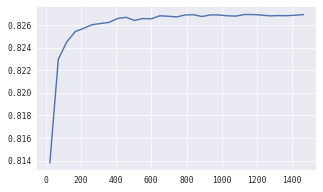

In [62]:
plot(arange(24, 1500, 48)[:len(oob_scores)], oob_scores);

ок, выберем 600 деревьев и найдем лучше параметры. Когда найдем - посмотрим скор на 1200 деревьях

In [63]:
%%time
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {'criterion': ['gini', 'entropy'], 
                       'max_features': ['sqrt', 'log2', None], 
                       'max_depth': [3, 10, 20, None],
                       'bootstrap': [True, False]}


RF = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=600)
grid_searcher = RandomizedSearchCV(RF, param_distributions, n_iter=20, 
                                   cv=kfold, scoring='roc_auc',
                                   verbose=True)
grid_searcher.fit(X, y)
print('best score:', grid_searcher.best_score_, grid_searcher.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 116.1min finished


best score: 0.752665726832 {'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
CPU times: user 3h 50min 28s, sys: 1min 29s, total: 3h 51min 57s
Wall time: 1h 57min 22s


Всего лишь час ожидания - и мы нашли идеальные параметры. Это нам дало ~1% к скору. 

Ожидаемо, мы используем bootstrap, а при выборе фичей на каждом сплите ограничиваемся значением по умолчанию - sqrt из количества фичей. Немного удивительно, что оно выбрало max_depth=20. Давайте посмотрим, какие наборы гипер-параметров показывают близкие значения roc_auc:

In [64]:
grid_searcher.grid_scores_

/Users/i.slinko/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.72657, std: 0.00171, params: {'max_features': None, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False},
 mean: 0.68777, std: 0.00120, params: {'max_features': None, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': True},
 mean: 0.58893, std: 0.00188, params: {'max_features': None, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False},
 mean: 0.75267, std: 0.00083, params: {'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True},
 mean: 0.75256, std: 0.00070, params: {'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': False},
 mean: 0.74314, std: 0.00123, params: {'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'bootstrap': True},
 mean: 0.61549, std: 0.00382, params: {'max_features': None, 'max_depth': 20, 'criterion': 'gini', 'bootstrap': False},
 mean: 0.74676, std: 0.00023, params: {'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False},
 mean: 0.73629, std: 0.001

Хм, есть ощущение, что надо попробовать max_depth=None просто не повезло соседствовать с хорошими гипер-параметрами. Давайте посмотрим:

In [65]:
RF = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=600, 
                            criterion= 'entropy')
cross_val_score(RF, X, y, cv=kfold, scoring='roc_auc')

array([ 0.74559716,  0.74579602,  0.74440742])

Кажется, глубина в 20 действительно что-то дает. Давайте еще поварьируем глубину..

In [66]:
RF = RandomForestClassifier(random_state=42, oob_score=True, n_estimators=600, n_jobs=2)

oob_scores = []
for max_depth in [13, 17, 21, 25, 29, 33, 37]:
    RF.max_depth = max_depth
    %time RF.fit(X, y)
    oob_score = RF.oob_score_
    oob_scores.append(oob_score)
    print(max_depth, oob_score)

CPU times: user 1min 51s, sys: 1.48 s, total: 1min 53s
Wall time: 1min 2s
13 0.82755672168
CPU times: user 2min 16s, sys: 2.18 s, total: 2min 19s
Wall time: 1min 16s
17 0.828341513125
CPU times: user 2min 38s, sys: 2.68 s, total: 2min 40s
Wall time: 1min 27s
21 0.828493786092
CPU times: user 2min 51s, sys: 3.3 s, total: 2min 54s
Wall time: 1min 35s
25 0.828042823844
CPU times: user 2min 59s, sys: 3.56 s, total: 3min 3s
Wall time: 1min 39s
29 0.826906633245
CPU times: user 3min 2s, sys: 3.62 s, total: 3min 5s
Wall time: 1min 41s
33 0.82689491994
CPU times: user 3min 5s, sys: 3.9 s, total: 3min 9s
Wall time: 1min 44s
37 0.826853923372


глубина 20 действительно дает лучший результат

## Давайте попробуем XGBoost.
Вообще, с этого стоило начать, но почему не оставить сладкое на потом? :)

Градиентный бустинг и его реализация <a href="http://xgboost.readthedocs.io/en/latest/">XGBoost</a> - самый популярный в соревнованиях алгоритм машинного обучения. Его принцип: последовательное добавление решающих деревьев к композиции. Каждое следующее дерево исправляет ошибки предыдущей композиции деревьев.

In [67]:
import xgboost as xgb
from xgboost import XGBClassifier

/Users/i.slinko/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [68]:
XGB = XGBClassifier()
cross_val_score(XGB, X, y, cv=kfold, scoring='roc_auc')

array([ 0.75387554,  0.75273378,  0.75480567])

Ну что ж, это на процент лучше чем RF. Есть смысл поварьировать параметры - оставляю это вам. В отличие от RF, тут нет такого правила, что чем больше деревьев - тем лучше. Увеличение дает переобучение, под это даже есть некоторая теоретическая база, хотя некоторые утверждают иначе. Не верьте им ;)

Давайте же скорее предскажем значения на настоящей тестовой выборке и займем почетное 1-е место.

In [69]:
# обучаем xgboost на всей выборке:
XGB.fit(X,y)
# оцениваем вероятность 1-го класса на тестовой выборке
probas = XGB.predict_proba(X_test_scaled)[:,1]

Генерируем файл-ответ:

In [70]:
df_to_save = pd.DataFrame(data={"_ID_" : df_test['client_id'], 
                                "_VAL_": probas}) 
df_to_save.to_csv("submission.csv", sep=',' , index=False)

Это нам дает <a href="https://boosters.pro/champ_3?success=0#">217 место на лидерборде</a>. Видимо, не только мы умеем пользоваться xgboost'ом  ;)

## Советы по улучшению.

0) в xgboost'е можно оптимизировать ранжирование (а ROC AUC - внезапно метрика качества ранжирования). Гуглить direct auc optimization, objective='rank:pairwise', eval_metric='auc'. У меня за 10 мин из этого ничего не вышло, но мб я просто мало копал.

1) Попробуйте поварьировать параметры xgboost'а, как мы это делали для RF. XGBoost обучается быстрее и это у вас займет меньше времени. Перед этим стоит оценить, сколько вам нужно фолдов. Я бы взял как минимум 5, потому как для 3-х фолдов, скор их среднего, дает какой-то рандом. То, как можно выбирать кол-во фолдов описано в ноутбуке cross_validation.ipynb

2) вообще говоря, xgboost умеет более умно работать с пропусками данных, чем то, как мы с ними поступили. Погуглите эту тему. Попробуйте другие стратегии заполнения пропусков. Попробуйте другие способы преобразования категориальных фичей.

2.5) возможно, какие-то фичи портят решение. С xgboost'ом такое редко бывает, но не будет лишним попробовать повыкидывать по 1 фиче и посмотреть, не улучашется ли результат.

3) Стеккинг. Собственно, из-за этого процессорное время на обучение растягивается от 5 минут до бесконечности. Суть такая: мы с вами обучили 3 алгоритма: RF, XGB, LR. Давайте просуммируем их predict_proba с некоторыми коэффициентами, которые можем хоть перебором найти. Понятно, что более хорошие алгоритмы будут иметь более весомые коэффициенты. В принципе, мы можем взять все известные нам алгоритмы, взять все их гипер-парамеры, взять 100500 подвыборок от данных и 100500 различных преобразований с колонками данных (добавление/удаление тоже считается), все это смешать и получить супер-алгоритм, которы будет работать вечно и никогда не будет встроен в продакшен. Иногда это дает +1% или 2% к итоговому результату. 

Собственно, в конкурсах так и происходит. У людей уже написан код, который запускает эту махину на произвольных входных данных. Остается только курить трубку да поглядывать на прогресс. 

Конечно, все равно выигрывают те, кто подумал головой и нашел какие-то закономерности в данных. Как, например, длина шерсти из нашей задачки про shelter animals или фаза луны, в которой происходит кредитование. Такую зависимость перебором найти сложно. Но и без stacking уже не выиграешь ;)

Библиотеки для стеккинга, автоматизированного подбора параметров и модификаций данных:
    
-  https://github.com/yandex/rep - scikit-learn -совместимый враппер для различных библиотек. Умный подбор гиперпараметров. Стеккинг <br>
- http://hyperopt.github.io/hyperopt-sklearn - подбор гиперпараметров, ориентированный на конкретный алгоритм<br>
- https://github.com/rhiever/tpot - черный ящик из алгоритмов и пердобработок, который можно оставить на несколько часов/дней и получить чрезвычано сложную, но оптимальную модель<br>

<img src="http://risovach.ru/upload/2014/09/mem/koshecka_61329312_orig_.jpg" width=300>